# **LOGISTIC REGRESSION**

Overview
*   This lab assignment focuses on implementing Logistic Regression to predict loan defaults using the Loan Default Prediction Dataset.
*   You will develop models perform **Logistic Regression** on Loan Default Prediction Dataset datasets using **Gradient Descent** method to identify high-risk individuals, allowing for timely interventions in financial loan services.


# **DATASET**


1.  **Source:** Loan Default Prediction [Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default)
2.   **Size:** 255,347 rows and 18 columns

**Purpose:** Predict the likelihood of loan default




In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_diabetes, fetch_california_housing
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')



**TASK 1**:



1. Preprocess the data








In [2]:
loan_data = pd.read_csv('/content/Loan_default.csv')
print('Dataset Info')
print(loan_data.info())
print('\nDataset Datatypes')
print(loan_data.dtypes)
print('\nDataset Describe')
print(loan_data.describe())



Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 1

In [3]:
loan_data=loan_data.drop('LoanID', axis=1)

In [4]:
print(loan_data.isnull().sum())

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


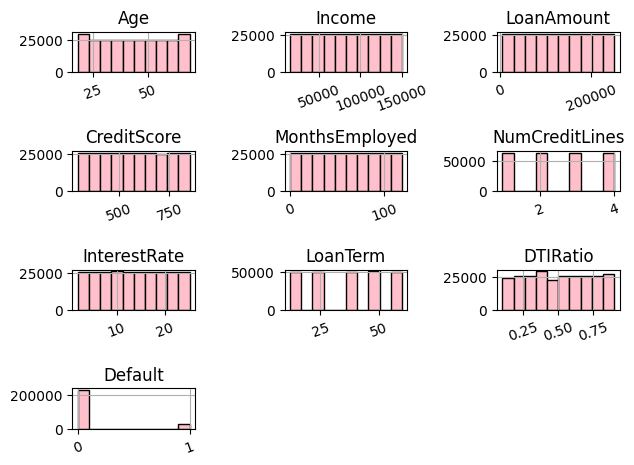

In [5]:
loan_data.hist(xrot=20,edgecolor='black' , color='pink')
plt.tight_layout()
plt.show()

In [6]:
# print('Pairplot')
# sns.pairplot(loan_data, diag_kind='kde', size=2)
# plt.tight_layout()
# plt.show()


                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

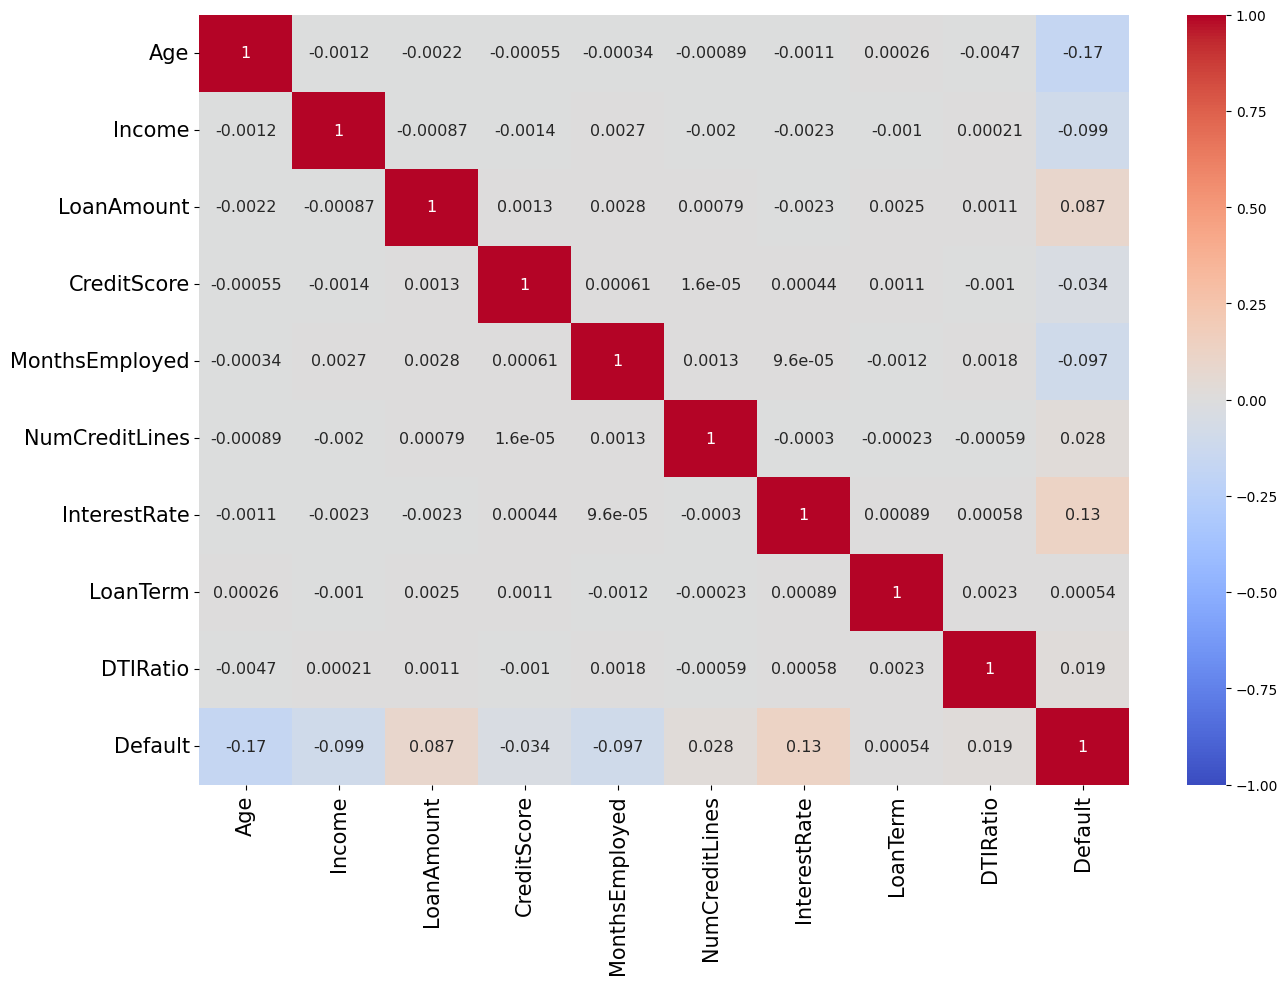

In [7]:
correlation_matrix = loan_data.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

print('Heatmap')
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=True,
            annot_kws={"size": 11.5},
            vmax=1,
            vmin=-1,
          )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:

categorical_cols = loan_data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_cols)

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(loan_data[col].unique())
    print("\n")


Categorical columns:
Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')
Unique values in 'Education':
["Bachelor's" "Master's" 'High School' 'PhD']


Unique values in 'EmploymentType':
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']


Unique values in 'MaritalStatus':
['Divorced' 'Married' 'Single']


Unique values in 'HasMortgage':
['Yes' 'No']


Unique values in 'HasDependents':
['Yes' 'No']


Unique values in 'LoanPurpose':
['Other' 'Auto' 'Business' 'Home' 'Education']


Unique values in 'HasCoSigner':
['Yes' 'No']




In [9]:
data_encoded = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  bool   
 11  Education_Master's            255347 non-null  bool   
 12  Education_PhD                 255347 non-nul

# **TASK 2**:

# **Data Splitting:**

# **Implement the following data splitting strategies:**

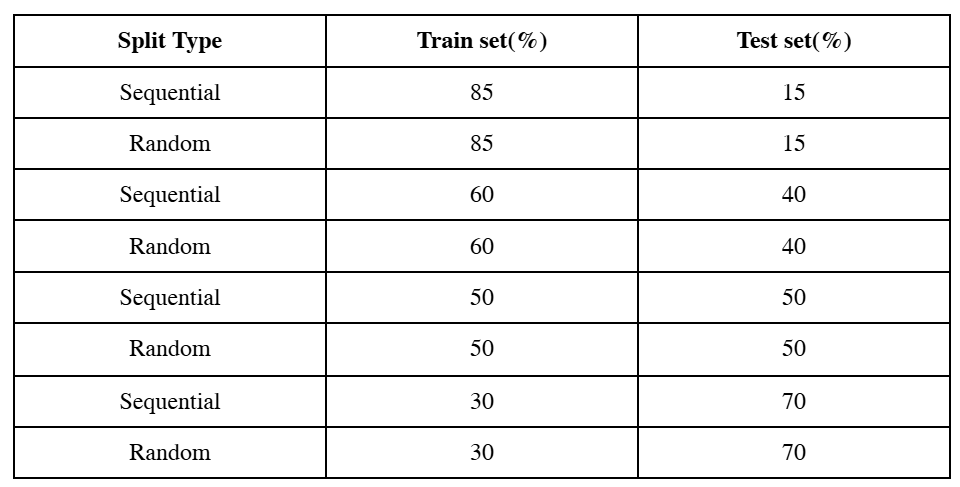

In [10]:
from sklearn.model_selection import train_test_split

def sequential_split(data, train_size):
    split_index = int(len(data) * train_size)
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]
    return train_data, test_data


def random_split(data, train_size):
    train_data, test_data = train_test_split(data, train_size=train_size, random_state=42)
    return train_data, test_data

splits = [
    (0.85, 0.15),
    (0.60, 0.40),
    (0.50, 0.50),
    (0.30, 0.70)
]

for train_size, test_size in splits:
    print(f"Sequential split - Train: {train_size*100}%, Test: {test_size*100}%")
    seq_train, seq_test = sequential_split(data_encoded, train_size)
    print(f"Sequential Train size: {len(seq_train)}, Test size: {len(seq_test)}")

    print(f"Random split - Train: {train_size*100}%, Test: {test_size*100}%")
    rand_train, rand_test = random_split(data_encoded, train_size)
    print(f"Random Train size: {len(rand_train)}, Test size: {len(rand_test)}\n")


Sequential split - Train: 85.0%, Test: 15.0%
Sequential Train size: 217044, Test size: 38303
Random split - Train: 85.0%, Test: 15.0%
Random Train size: 217044, Test size: 38303

Sequential split - Train: 60.0%, Test: 40.0%
Sequential Train size: 153208, Test size: 102139
Random split - Train: 60.0%, Test: 40.0%
Random Train size: 153208, Test size: 102139

Sequential split - Train: 50.0%, Test: 50.0%
Sequential Train size: 127673, Test size: 127674
Random split - Train: 50.0%, Test: 50.0%
Random Train size: 127673, Test size: 127674

Sequential split - Train: 30.0%, Test: 70.0%
Sequential Train size: 76604, Test size: 178743
Random split - Train: 30.0%, Test: 70.0%
Random Train size: 76604, Test size: 178743



# **TASK 3**
# Gradient Descent Implementations

Implement using: Implement three variants of Gradient Descent:

• SGD (Stochastic Gradient Descent)

•	GD (Gradient Descent)

•	BGD (Batch Gradient Descent)

Important Notes:
1.  Implement the update rules manually without using built-in functions
2.  Experiment with different learning rates and epochs
1.   Analyze the impact of these hyperparameters on model performance


In [11]:
def sigmoid(z):
    z = np.asarray(z)
    z = z.astype(int)
    return 1 / (1 + np.exp(-z))

def GD(X, y, learning_rate, epochs):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        grad = np.dot(X.T, (y_pred - y)) / m
        w = w - learning_rate * grad
        loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss}")
    return w, loss_history

def SGD(X, y, learning_rate=0.01, epochs=10):
    X = np.asarray(X)
    y = np.asarray(y)
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            z = np.dot(X[i], w)
            y_pred = sigmoid(z)
            w = w - learning_rate * (y_pred - y[i]) * X[i]

        loss = np.mean((sigmoid(np.dot(X, w)) - y) ** 2) / 2
        loss_history.append(loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss}")

    return w, loss_history

def BGD(X, y, learning_rate=0.01, epochs=10, batch_size=5):
    X = np.asarray(X)
    y = np.asarray(y)
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []
    num_batches = int(np.ceil(m / batch_size))
    for epoch in range(epochs):
        i = np.random.permutation(m)
        X_new = X[i]
        y_new = y[i]
        for batch in range(num_batches):
            begin = batch * batch_size
            end = min(begin + batch_size, m)
            X_batch = X_new[begin:end]
            y_batch = y_new[begin:end]

            z_batch = np.dot(X_batch, w)
            y_pred_batch = sigmoid(z_batch)
            grad = np.dot(X_batch.T, (y_pred_batch - y_batch)) / batch_size
            w = w - (learning_rate * grad)

        y_pred_full = sigmoid(np.dot(X, w))
        loss = -np.mean(y * np.log(y_pred_full + 1e-8) + (1 - y) * np.log(1 - y_pred_full + 1e-8))
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss}")
    return w, loss_history


# **TASK 4**:
  **Result Compilation**

NOTE:
1.  Test the models on the designated test sets
2.  Evaluate model accuracy using confusion matrices
1.   Create a comprehensive table summarizing results for all cases

Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.884028376095154
GD - Accuracy on test data: 0.8835062985444815
GD - Confusion Matrix:
[[67681     0]
 [ 8924     0]]



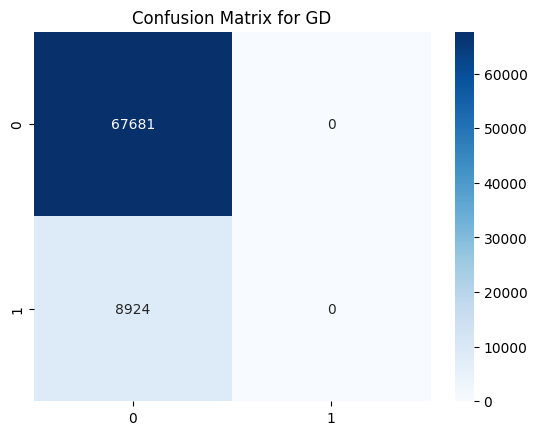

Epoch 0 | Loss: 0.442014188047577
SGD - Accuracy on training data: 0.1159716239048461
SGD - Accuracy on test data: 0.11649370145551857
SGD - Confusion Matrix:
[[    0 67681]
 [    0  8924]]



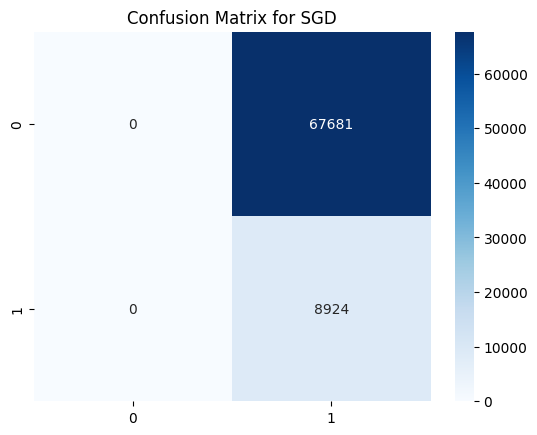

Epoch 0 | Loss: 2.1362762504686006
BGD - Accuracy on training data: 0.884028376095154
BGD - Accuracy on test data: 0.8835062985444815
BGD - Confusion Matrix:
[[67681     0]
 [ 8924     0]]



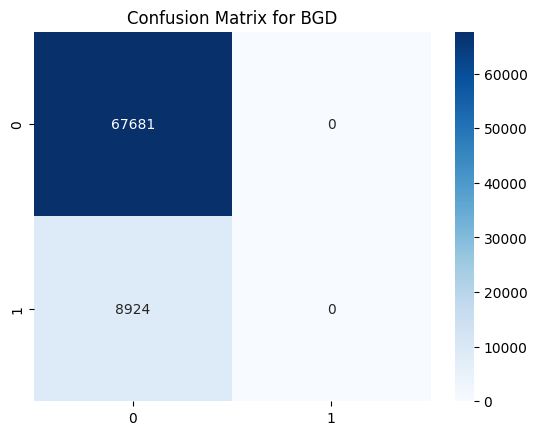

Model Performance Summary:
GD - Train Accuracy: 0.884028376095154, Test Accuracy: 0.8835062985444815
SGD - Train Accuracy: 0.1159716239048461, Test Accuracy: 0.11649370145551857
BGD - Train Accuracy: 0.884028376095154, Test Accuracy: 0.8835062985444815


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def evaluate_model(X_train, y_train, X_test, y_test, method, learning_rate, epochs, batch_size=None):
    if method == 'GD':
        weights, _ = GD(X_train, y_train.values, learning_rate, epochs)
    elif method == 'SGD':
        weights, _ = SGD(X_train, y_train.values, learning_rate, epochs)
    elif method == 'BGD':
        weights, _ = BGD(X_train, y_train.values, learning_rate, epochs, batch_size)
    y_pred_train = np.dot(X_train, weights)
    y_pred_test = np.dot(X_test, weights)
    y_pred_train = (y_pred_train >= 0.5).astype(int)
    y_pred_test = (y_pred_test >= 0.5).astype(int)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    print(f"{method} - Accuracy on training data: {accuracy_train}")
    print(f"{method} - Accuracy on test data: {accuracy_test}")
    print(f"{method} - Confusion Matrix:\n{cm}\n")

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {method}')
    plt.show()

    return accuracy_train, accuracy_test

X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('Default', axis=1), data_encoded['Default'], test_size=0.3, random_state=42)

results = {}

results['GD'] = evaluate_model(X_train, y_train, X_test, y_test, method='GD', learning_rate=0.0001, epochs=10)

results['SGD'] = evaluate_model(X_train, y_train, X_test, y_test, method='SGD', learning_rate=0.0001, epochs=10)

results['BGD'] = evaluate_model(X_train, y_train, X_test, y_test, method='BGD', learning_rate=0.0001, epochs=10, batch_size=32)

print("Model Performance Summary:")
for method, (train_acc, test_acc) in results.items():
    print(f"{method} - Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Evaluating for split 85.0% train, 15.0% test
Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8837470743259431
GD - Accuracy on test data: 0.8845782314701198
GD - Confusion Matrix:
[[33882     0]
 [ 4421     0]]



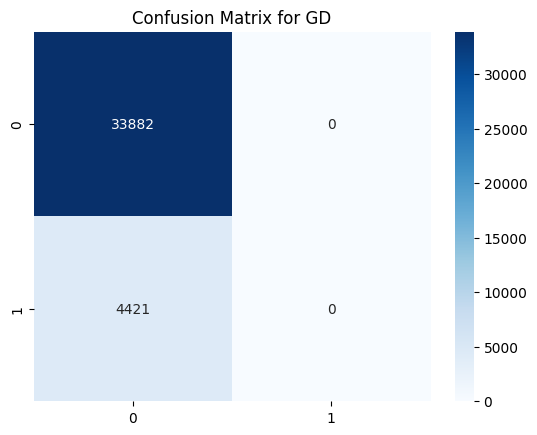

Epoch 0 | Loss: 0.44187353716297156
SGD - Accuracy on training data: 0.8058918928880779
SGD - Accuracy on test data: 0.8091272224107772
SGD - Confusion Matrix:
[[30715  3167]
 [ 4144   277]]



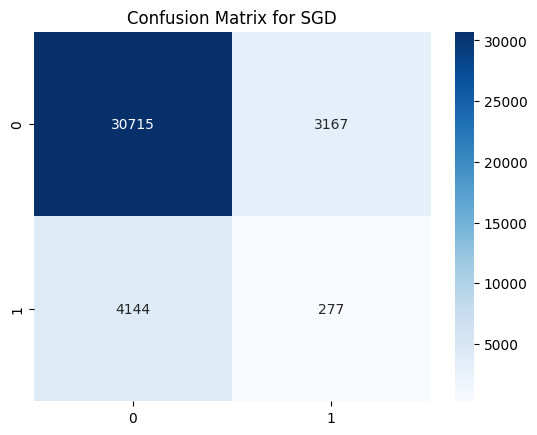

Epoch 0 | Loss: 2.141458020554754
BGD - Accuracy on training data: 0.8837470743259431
BGD - Accuracy on test data: 0.8845782314701198
BGD - Confusion Matrix:
[[33882     0]
 [ 4421     0]]



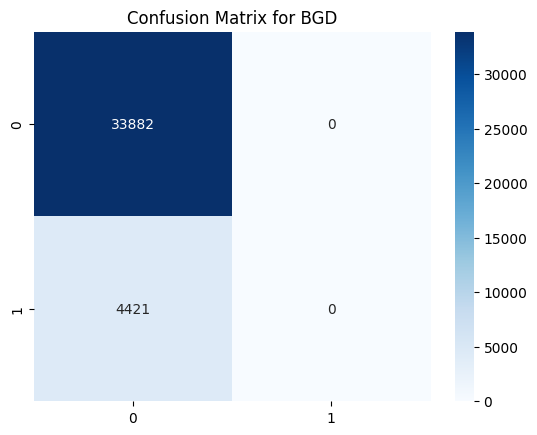

Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8837470743259431
GD - Accuracy on test data: 0.8845782314701198
GD - Confusion Matrix:
[[33882     0]
 [ 4421     0]]



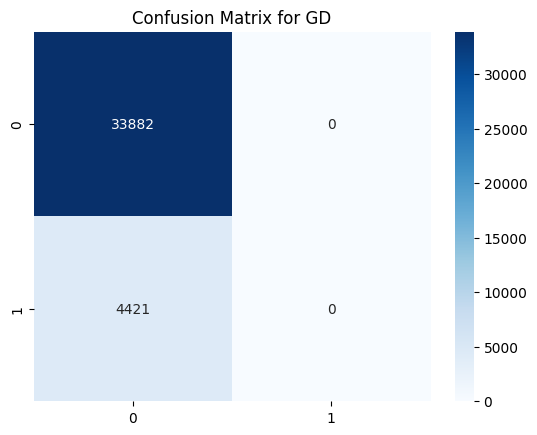

Epoch 0 | Loss: 0.058126462837028436
SGD - Accuracy on training data: 0.8837470743259431
SGD - Accuracy on test data: 0.8845782314701198
SGD - Confusion Matrix:
[[33882     0]
 [ 4421     0]]



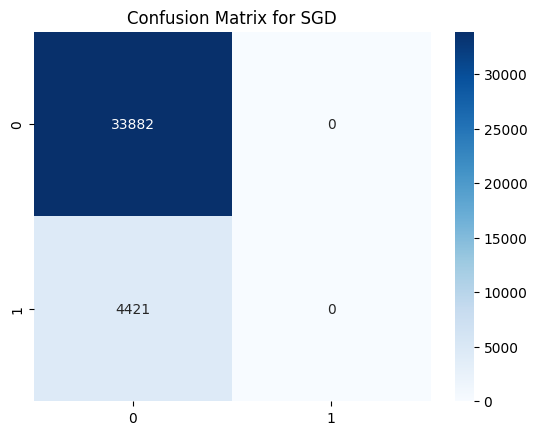

Epoch 0 | Loss: 2.141458020554754
BGD - Accuracy on training data: 0.8837470743259431
BGD - Accuracy on test data: 0.8845782314701198
BGD - Confusion Matrix:
[[33882     0]
 [ 4421     0]]



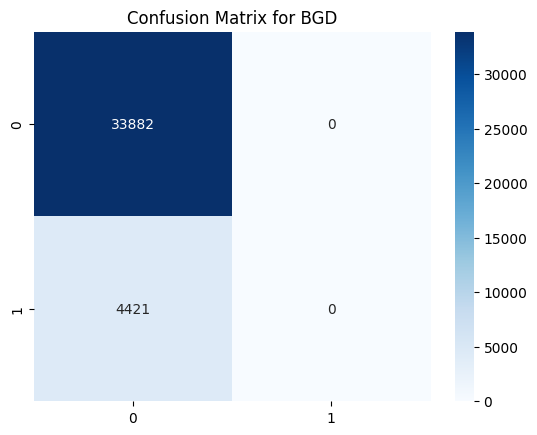

Evaluating for split 60.0% train, 40.0% test
Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8844250952952848
GD - Accuracy on test data: 0.8830417372404272
GD - Confusion Matrix:
[[90193     0]
 [11946     0]]



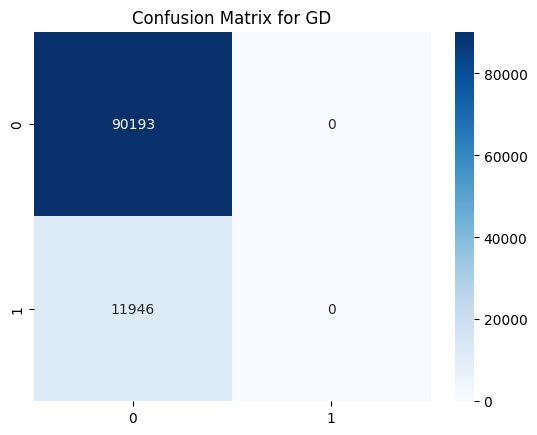

Epoch 0 | Loss: 0.4422125476476424
SGD - Accuracy on training data: 0.11557490470471515
SGD - Accuracy on test data: 0.11695826275957275
SGD - Confusion Matrix:
[[    0 90193]
 [    0 11946]]



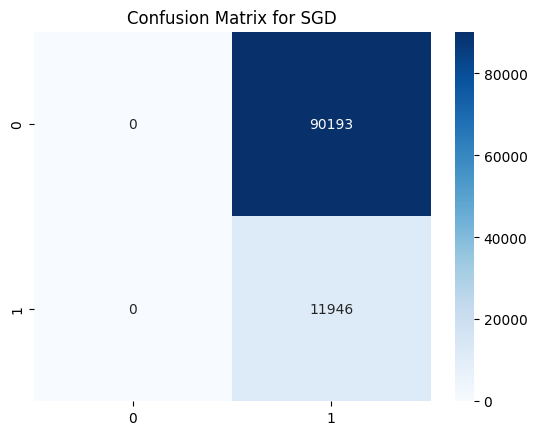

Epoch 0 | Loss: 7.518563808944956
BGD - Accuracy on training data: 0.8844250952952848
BGD - Accuracy on test data: 0.8830417372404272
BGD - Confusion Matrix:
[[90193     0]
 [11946     0]]



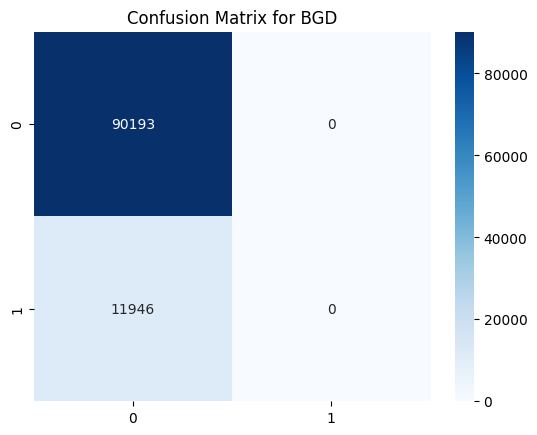

Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8845947992271944
GD - Accuracy on test data: 0.8827871821733129
GD - Confusion Matrix:
[[90167     0]
 [11972     0]]



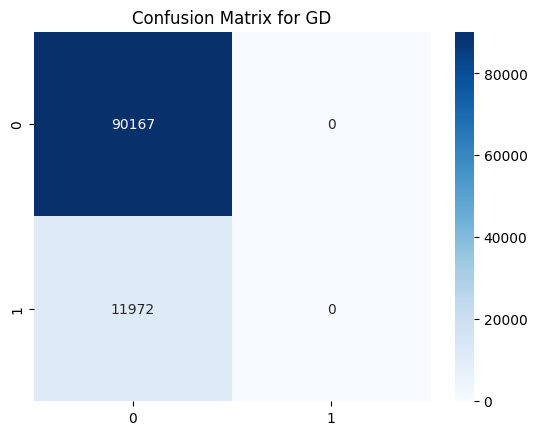

Epoch 0 | Loss: 0.07998276992043664
SGD - Accuracy on training data: 0.8845947992271944
SGD - Accuracy on test data: 0.8827871821733129
SGD - Confusion Matrix:
[[90167     0]
 [11972     0]]



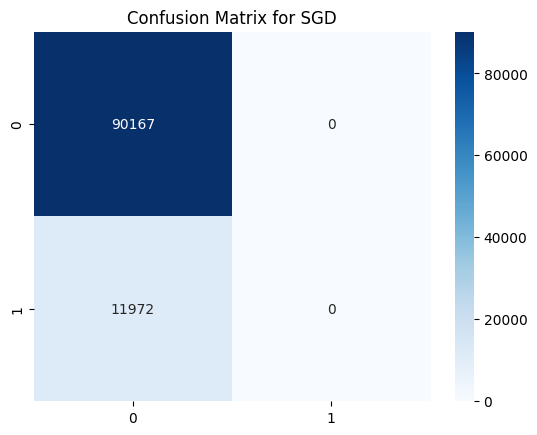

Epoch 0 | Loss: 15.414750346119856
BGD - Accuracy on training data: 0.8845947992271944
BGD - Accuracy on test data: 0.8827871821733129
BGD - Confusion Matrix:
[[90167     0]
 [11972     0]]



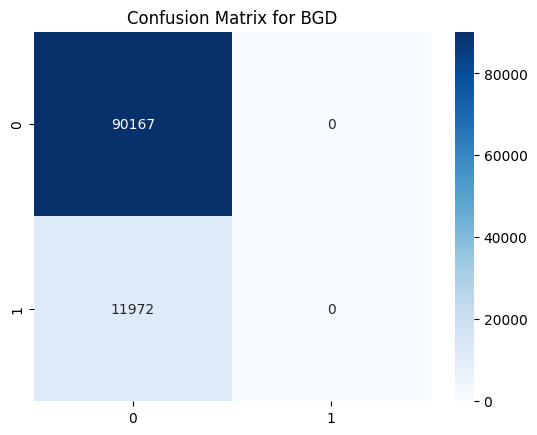

Evaluating for split 50.0% train, 50.0% test
Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8841806803317851
GD - Accuracy on test data: 0.883562824067547
GD - Confusion Matrix:
[[112808      0]
 [ 14866      0]]



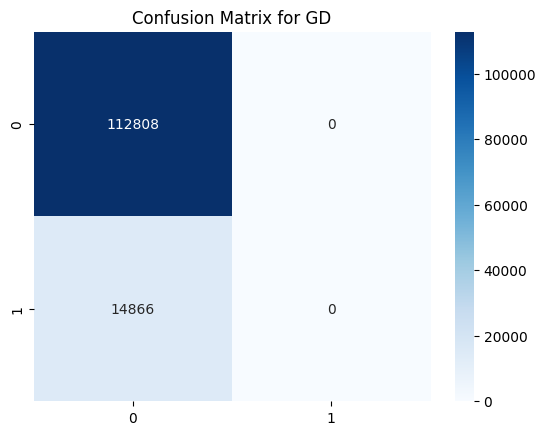

Epoch 0 | Loss: 0.44209034016589255
SGD - Accuracy on training data: 0.11581931966821489
SGD - Accuracy on test data: 0.11643717593245297
SGD - Confusion Matrix:
[[     0 112808]
 [     0  14866]]



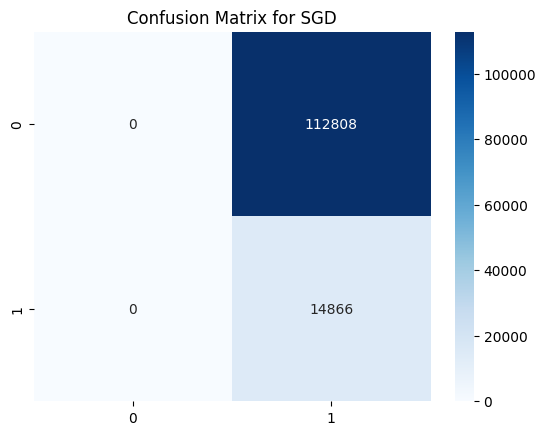

Epoch 0 | Loss: 2.1334707027481428
BGD - Accuracy on training data: 0.8841806803317851
BGD - Accuracy on test data: 0.883562824067547
BGD - Confusion Matrix:
[[112808      0]
 [ 14866      0]]



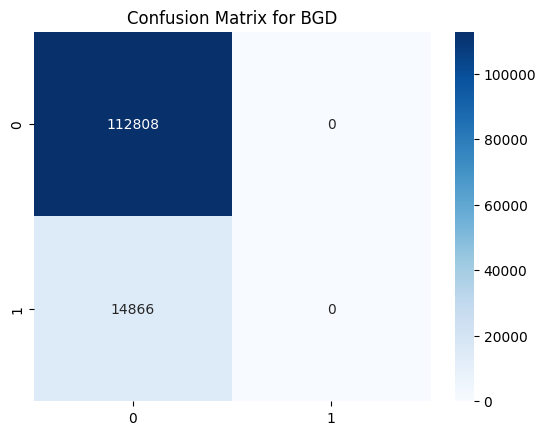

Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8846271333798063
GD - Accuracy on test data: 0.8831163745163463
GD - Confusion Matrix:
[[112751      0]
 [ 14923      0]]



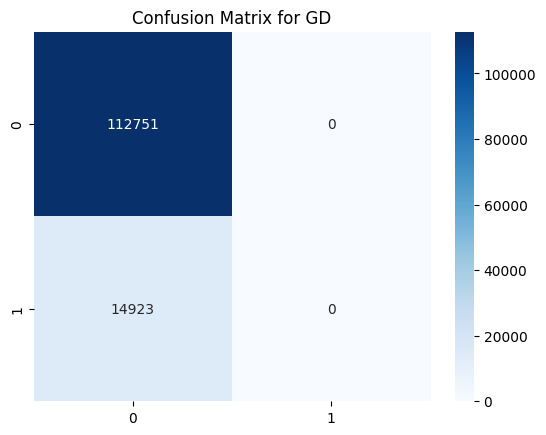

Epoch 0 | Loss: 0.3227650914351134
SGD - Accuracy on training data: 0.3687780501750566
SGD - Accuracy on test data: 0.3704904679104595
SGD - Confusion Matrix:
[[35518 77233]
 [ 3139 11784]]



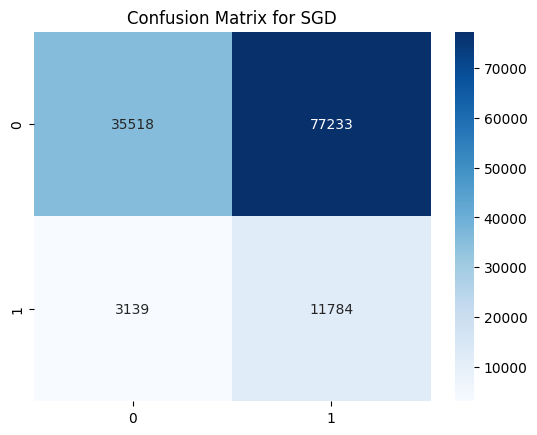

Epoch 0 | Loss: 14.251989398696335
BGD - Accuracy on training data: 0.8846271333798063
BGD - Accuracy on test data: 0.8831163745163463
BGD - Confusion Matrix:
[[112751      0]
 [ 14923      0]]



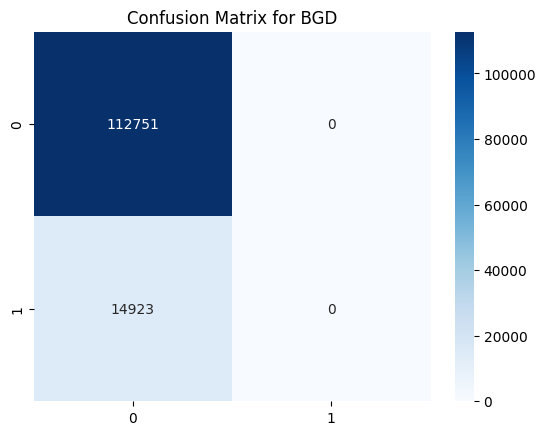

Evaluating for split 30.0% train, 70.0% test
Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8847579760847998
GD - Accuracy on test data: 0.8834919409431419
GD - Confusion Matrix:
[[157918      0]
 [ 20825      0]]



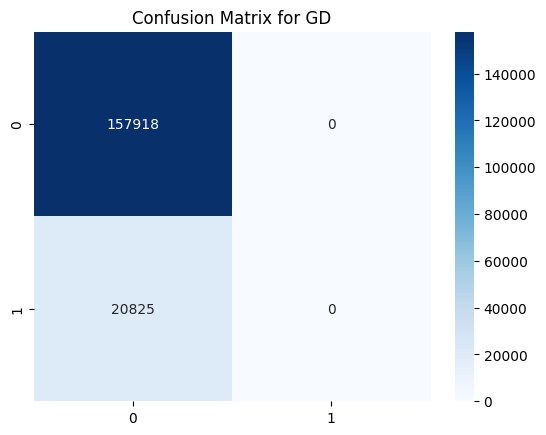

Epoch 0 | Loss: 0.057621011957600124
SGD - Accuracy on training data: 0.7273510521643778
SGD - Accuracy on test data: 0.7247220870187924
SGD - Confusion Matrix:
[[126862  31056]
 [ 18148   2677]]



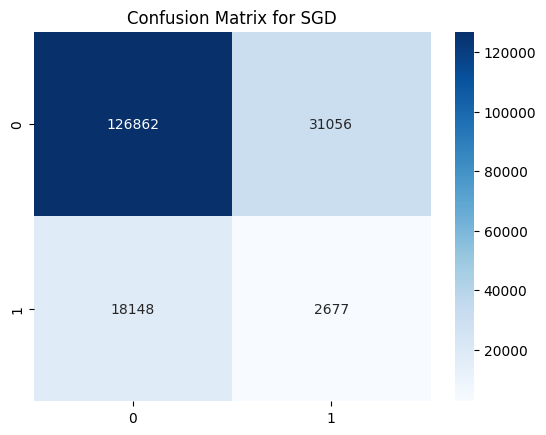

Epoch 0 | Loss: 2.1228365219812475
BGD - Accuracy on training data: 0.8847579760847998
BGD - Accuracy on test data: 0.8834919409431419
BGD - Confusion Matrix:
[[157918      0]
 [ 20825      0]]



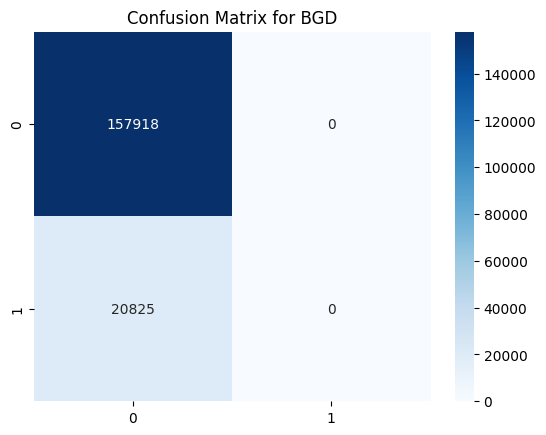

Epoch 0 | Loss: 0.6931471605599454
GD - Accuracy on training data: 0.8840791603571615
GD - Accuracy on test data: 0.8837828614267412
GD - Confusion Matrix:
[[157970      0]
 [ 20773      0]]



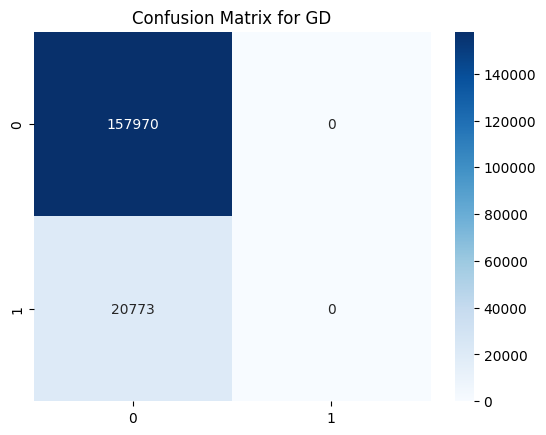

Epoch 0 | Loss: 0.057960419821419244
SGD - Accuracy on training data: 0.8840791603571615
SGD - Accuracy on test data: 0.8837828614267412
SGD - Confusion Matrix:
[[157970      0]
 [ 20773      0]]



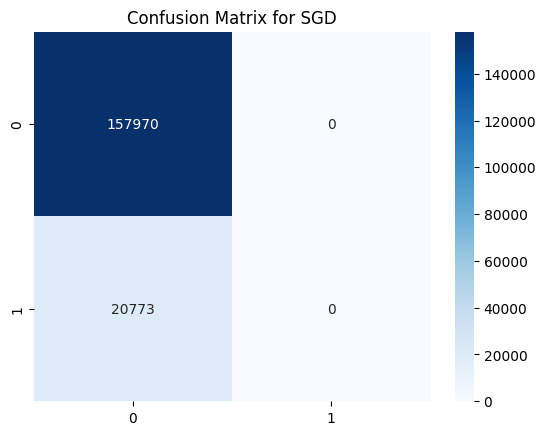

Epoch 0 | Loss: 2.1353407697908335
BGD - Accuracy on training data: 0.8840791603571615
BGD - Accuracy on test data: 0.8837828614267412
BGD - Confusion Matrix:
[[157970      0]
 [ 20773      0]]



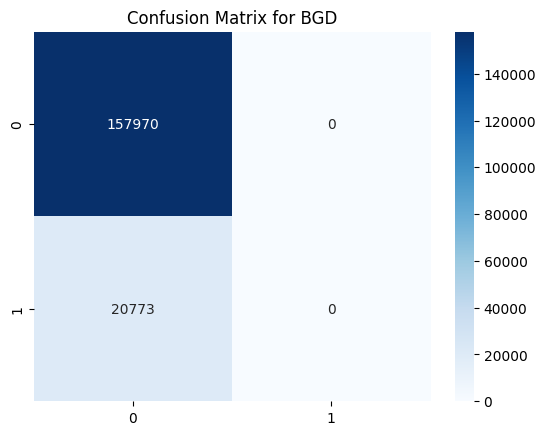

   Method Split Ratio    Strategy  Train Accuracy  Test Accuracy
0      GD   85.0/15.0      Random        0.883747       0.884578
1     SGD   85.0/15.0      Random        0.805892       0.809127
2     BGD   85.0/15.0      Random        0.883747       0.884578
3      GD   85.0/15.0  Sequential        0.883747       0.884578
4     SGD   85.0/15.0  Sequential        0.883747       0.884578
5     BGD   85.0/15.0  Sequential        0.883747       0.884578
6      GD   60.0/40.0      Random        0.884425       0.883042
7     SGD   60.0/40.0      Random        0.115575       0.116958
8     BGD   60.0/40.0      Random        0.884425       0.883042
9      GD   60.0/40.0  Sequential        0.884595       0.882787
10    SGD   60.0/40.0  Sequential        0.884595       0.882787
11    BGD   60.0/40.0  Sequential        0.884595       0.882787
12     GD   50.0/50.0      Random        0.884181       0.883563
13    SGD   50.0/50.0      Random        0.115819       0.116437
14    BGD   50.0/50.0    

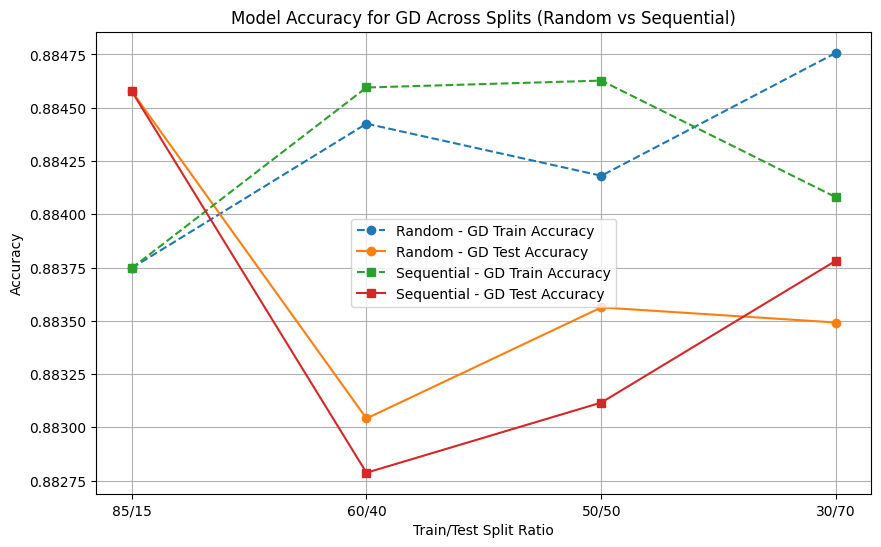

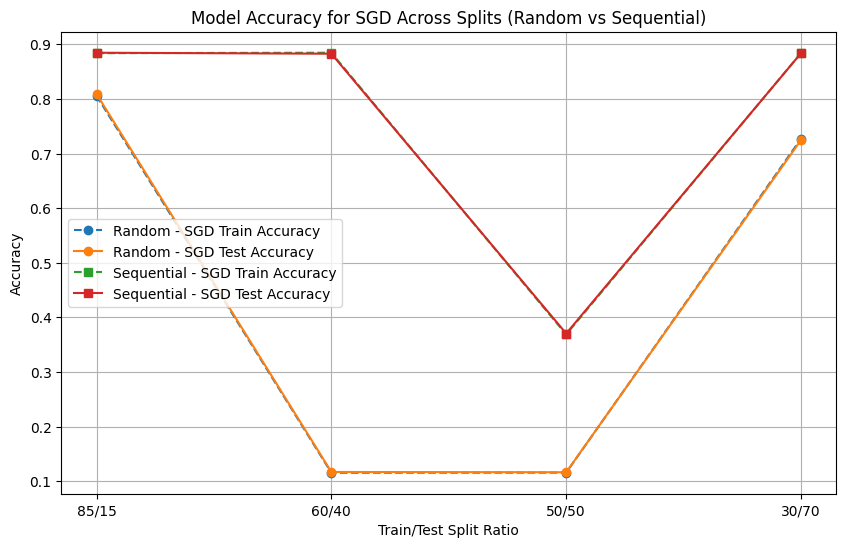

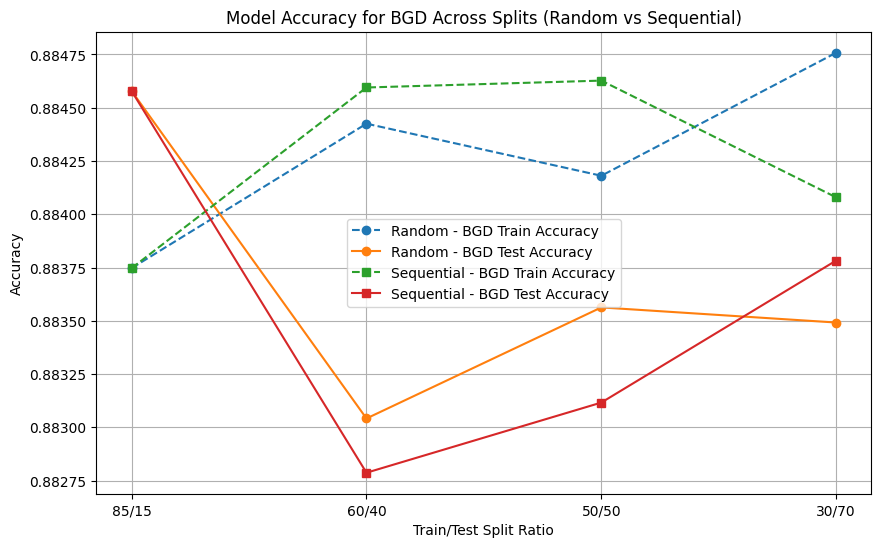

In [14]:

splits = [(0.85, 0.15), (0.60, 0.40), (0.50, 0.50), (0.30, 0.70)]
results_random = {'GD': [], 'SGD': [], 'BGD': []}
results_sequential = {'GD': [], 'SGD': [], 'BGD': []}
table_data = []

for train_size, test_size in splits:
    print(f"Evaluating for split {train_size * 100}% train, {test_size * 100}% test")

    X_train, X_test, y_train, y_test = train_test_split(
        data_encoded.drop('Default', axis=1),
        data_encoded['Default'],
        test_size=test_size, random_state=42
    )

    split_idx = int(train_size * len(data_encoded))
    X_train_seq, X_test_seq = data_encoded.drop('Default', axis=1)[:split_idx], data_encoded.drop('Default', axis=1)[split_idx:]
    y_train_seq, y_test_seq = data_encoded['Default'][:split_idx], data_encoded['Default'][split_idx:]

    random_gd_results = evaluate_model(X_train, y_train, X_test, y_test, method='GD', learning_rate=0.0001, epochs=10)
    random_sgd_results = evaluate_model(X_train, y_train, X_test, y_test, method='SGD', learning_rate=0.0001, epochs=10)
    random_bgd_results = evaluate_model(X_train, y_train, X_test, y_test, method='BGD', learning_rate=0.0001, epochs=10, batch_size=32)

    results_random['GD'].append(random_gd_results)
    results_random['SGD'].append(random_sgd_results)
    results_random['BGD'].append(random_bgd_results)

    sequential_gd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='GD', learning_rate=0.0001, epochs=10)
    sequential_sgd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='SGD', learning_rate=0.0001, epochs=10)
    sequential_bgd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='BGD', learning_rate=0.0001, epochs=10, batch_size=32)

    results_sequential['GD'].append(sequential_gd_results)
    results_sequential['SGD'].append(sequential_sgd_results)
    results_sequential['BGD'].append(sequential_bgd_results)

    table_data.append(['GD', f"{train_size * 100}/{test_size * 100}", 'Random', random_gd_results[0], random_gd_results[1]])
    table_data.append(['SGD', f"{train_size * 100}/{test_size * 100}", 'Random', random_sgd_results[0], random_sgd_results[1]])
    table_data.append(['BGD', f"{train_size * 100}/{test_size * 100}", 'Random', random_bgd_results[0], random_bgd_results[1]])

    table_data.append(['GD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_gd_results[0], sequential_gd_results[1]])
    table_data.append(['SGD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_sgd_results[0], sequential_sgd_results[1]])
    table_data.append(['BGD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_bgd_results[0], sequential_bgd_results[1]])

df_results = pd.DataFrame(table_data, columns=['Method', 'Split Ratio', 'Strategy', 'Train Accuracy', 'Test Accuracy'])
print(df_results)

def extract_accuracies(results):
    train_accs = [r[0] for r in results]
    test_accs = [r[1] for r in results]
    return train_accs, test_accs


def plot_results(method, results_random, results_sequential, splits):
    train_accs_random, test_accs_random = extract_accuracies(results_random[method])
    train_accs_seq, test_accs_seq = extract_accuracies(results_sequential[method])

    split_ratios = [f"{int(train * 100)}/{int(test * 100)}" for train, test in splits]

    plt.figure(figsize=(10, 6))
    plt.plot(split_ratios, train_accs_random, marker='o', label=f'Random - {method} Train Accuracy', linestyle='--')
    plt.plot(split_ratios, test_accs_random, marker='o', label=f'Random - {method} Test Accuracy')
    plt.plot(split_ratios, train_accs_seq, marker='s', label=f'Sequential - {method} Train Accuracy', linestyle='--')
    plt.plot(split_ratios, test_accs_seq, marker='s', label=f'Sequential - {method} Test Accuracy')

    plt.title(f'Model Accuracy for {method} Across Splits (Random vs Sequential)')
    plt.xlabel('Train/Test Split Ratio')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


for method in ['GD', 'SGD', 'BGD']:
    plot_results(method, results_random, results_sequential, splits)


**TASK 5**:
Add all possible Visualization



1.   Generate multiple 2D plots showing the loss function for iterations and epochs
2.   Create plots for different learning rates

1. Repeat the process using an inbuilt gradient descent algorithm for comparison
**NOTE:** Do the same once again, but this time use the inbuilt gradient descent algorithm.




Epoch 0 | Loss: 0.6931471605599454
Epoch 10 | Loss: 2.1228365219812475
Epoch 20 | Loss: 2.1228365219812475
Epoch 30 | Loss: 2.1228365219812475
Epoch 40 | Loss: 2.1228365219812475
Epoch 50 | Loss: 2.1228365219812475
Epoch 60 | Loss: 2.1228365219812475
Epoch 70 | Loss: 2.1228365219812475
Epoch 80 | Loss: 2.1228365219812475
Epoch 90 | Loss: 2.1228365219812475
Epoch 100 | Loss: 2.1228365219812475
Epoch 110 | Loss: 2.1228365219812475
Epoch 120 | Loss: 6.2732375774974285
Epoch 130 | Loss: 2.1228365219812475
Epoch 140 | Loss: 2.1228365219812475
Epoch 150 | Loss: 2.1228365219812475
Epoch 160 | Loss: 2.1228365219812475
Epoch 170 | Loss: 10.24535945941409
Epoch 180 | Loss: 2.1228365219812475
Epoch 190 | Loss: 2.1228365219812475
Epoch 200 | Loss: 2.1228365219812475
Epoch 210 | Loss: 2.1228365219812475
Epoch 220 | Loss: 14.415880863213058
Epoch 230 | Loss: 2.1228365219812475
Epoch 240 | Loss: 2.1228365219812475
Epoch 250 | Loss: 2.1228365219812475
Epoch 260 | Loss: 2.1228365219812475
Epoch 270 | L

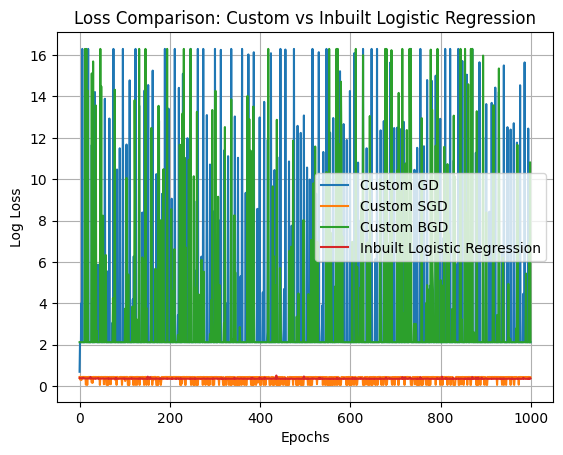

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
def evaluate_inbuilt_logistic_regression(X_train, y_train, X_test, y_test, epochs=20):
    model = LogisticRegression(max_iter=1, warm_start=True, solver='saga')
    loss_history_train = []
    loss_history_test = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)
        y_prob_train = model.predict_proba(X_train)
        y_prob_test = model.predict_proba(X_test)

        train_loss = log_loss(y_train, y_prob_train)
        test_loss = log_loss(y_test, y_prob_test)

        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    return model, loss_history_train, loss_history_test

weights_gd, loss_history_gd = GD(X_train, y_train, learning_rate=0.00001, epochs=1000)
weights_sgd, loss_history_sgd = SGD(X_train, y_train, learning_rate=0.00001, epochs=1000)
weights_bgd, loss_history_bgd = BGD(X_train, y_train, learning_rate=0.00001, epochs=1000, batch_size=100)

model_inbuilt, loss_history_train_inbuilt, loss_history_test_inbuilt = evaluate_inbuilt_logistic_regression(X_train, y_train, X_test, y_test, epochs=1000)

plt.plot(range(len(loss_history_gd)), loss_history_gd, label="Custom GD")
plt.plot(range(len(loss_history_sgd)), loss_history_sgd, label="Custom SGD")
plt.plot(range(len(loss_history_bgd)), loss_history_bgd, label="Custom BGD")

plt.plot(range(len(loss_history_test_inbuilt)), loss_history_test_inbuilt, label="Inbuilt Logistic Regression")

plt.title("Loss Comparison: Custom vs Inbuilt Logistic Regression")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(X_train, y_train, X_test, y_test, method, learning_rate=0.01, epochs=10, batch_size=32):
    if method == 'GD':
        w, _ = GD(X_train, y_train, learning_rate, epochs)
    elif method == 'SGD':
        w, _ = SGD(X_train, y_train, learning_rate, epochs)
    elif method == 'BGD':
        w, _ = BGD(X_train, y_train, learning_rate, epochs, batch_size)

    y_train_pred = (sigmoid(np.dot(X_train, w)) >= 0.5).astype(int)
    y_test_pred = (sigmoid(np.dot(X_test, w)) >= 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_auc = roc_auc_score(y_train, sigmoid(np.dot(X_train, w)))
    test_auc = roc_auc_score(y_test, sigmoid(np.dot(X_test, w)))

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_precision': train_precision, 'test_precision': test_precision,
        'train_recall': train_recall, 'test_recall': test_recall,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }


In [25]:
for train_size, test_size in splits:
    print(f"Evaluating for split {train_size * 100}% train, {test_size * 100}% test")

    X_train, X_test, y_train, y_test = train_test_split(
        data_encoded.drop('Default', axis=1),
        data_encoded['Default'],
        test_size=test_size, random_state=42
    )

    split_idx = int(train_size * len(data_encoded))
    X_train_seq, X_test_seq = data_encoded.drop('Default', axis=1)[:split_idx], data_encoded.drop('Default', axis=1)[split_idx:]
    y_train_seq, y_test_seq = data_encoded['Default'][:split_idx], data_encoded['Default'][split_idx:]

    random_gd_results = evaluate_model(X_train, y_train, X_test, y_test, method='GD', learning_rate=0.0001, epochs=10)
    random_sgd_results = evaluate_model(X_train, y_train, X_test, y_test, method='SGD', learning_rate=0.0001, epochs=10)
    random_bgd_results = evaluate_model(X_train, y_train, X_test, y_test, method='BGD', learning_rate=0.0001, epochs=10, batch_size=32)

    results_random['GD'].append(random_gd_results)
    results_random['SGD'].append(random_sgd_results)
    results_random['BGD'].append(random_bgd_results)

    sequential_gd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='GD', learning_rate=0.0001, epochs=10)
    sequential_sgd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='SGD', learning_rate=0.0001, epochs=10)
    sequential_bgd_results = evaluate_model(X_train_seq, y_train_seq, X_test_seq, y_test_seq, method='BGD', learning_rate=0.0001, epochs=10, batch_size=32)

    results_sequential['GD'].append(sequential_gd_results)
    results_sequential['SGD'].append(sequential_sgd_results)
    results_sequential['BGD'].append(sequential_bgd_results)

    table_data.append(['GD', f"{train_size * 100}/{test_size * 100}", 'Random', random_gd_results['train_accuracy'], random_gd_results['test_accuracy'], random_gd_results['train_precision'], random_gd_results['test_precision'], random_gd_results['train_recall'], random_gd_results['test_recall'], random_gd_results['train_f1'], random_gd_results['test_f1'], random_gd_results['train_auc'], random_gd_results['test_auc']])
    table_data.append(['SGD', f"{train_size * 100}/{test_size * 100}", 'Random', random_sgd_results['train_accuracy'], random_sgd_results['test_accuracy'], random_sgd_results['train_precision'], random_sgd_results['test_precision'], random_sgd_results['train_recall'], random_sgd_results['test_recall'], random_sgd_results['train_f1'], random_sgd_results['test_f1'], random_sgd_results['train_auc'], random_sgd_results['test_auc']])
    table_data.append(['BGD', f"{train_size * 100}/{test_size * 100}", 'Random', random_bgd_results['train_accuracy'], random_bgd_results['test_accuracy'], random_bgd_results['train_precision'], random_bgd_results['test_precision'], random_bgd_results['train_recall'], random_bgd_results['test_recall'], random_bgd_results['train_f1'], random_bgd_results['test_f1'], random_bgd_results['train_auc'], random_bgd_results['test_auc']])

    table_data.append(['GD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_gd_results['train_accuracy'], sequential_gd_results['test_accuracy'], sequential_gd_results['train_precision'], sequential_gd_results['test_precision'], sequential_gd_results['train_recall'], sequential_gd_results['test_recall'], sequential_gd_results['train_f1'], sequential_gd_results['test_f1'], sequential_gd_results['train_auc'], sequential_gd_results['test_auc']])
    table_data.append(['SGD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_sgd_results['train_accuracy'], sequential_sgd_results['test_accuracy'], sequential_sgd_results['train_precision'], sequential_sgd_results['test_precision'], sequential_sgd_results['train_recall'], sequential_sgd_results['test_recall'], sequential_sgd_results['train_f1'], sequential_sgd_results['test_f1'], sequential_sgd_results['train_auc'], sequential_sgd_results['test_auc']])
    table_data.append(['BGD', f"{train_size * 100}/{test_size * 100}", 'Sequential', sequential_bgd_results['train_accuracy'], sequential_bgd_results['test_accuracy'], sequential_bgd_results['train_precision'], sequential_bgd_results['test_precision'], sequential_bgd_results['train_recall'], sequential_bgd_results['test_recall'], sequential_bgd_results['train_f1'], sequential_bgd_results['test_f1'], sequential_bgd_results['train_auc'], sequential_bgd_results['test_auc']])

df_results = pd.DataFrame(table_data, columns=['Method', 'Split Ratio', 'Strategy', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC'])
print(df_results)


Evaluating for split 85.0% train, 15.0% test
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.44187353716297156
Epoch 0 | Loss: 9.439057576818122
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.058126462837028436
Epoch 0 | Loss: 2.141458020554754
Evaluating for split 60.0% train, 40.0% test
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.4422125476476424
Epoch 0 | Loss: 2.1289684127340247
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.07998276992043664
Epoch 0 | Loss: 2.1258423507816286
Evaluating for split 50.0% train, 50.0% test
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.44209034016589255
Epoch 0 | Loss: 2.1334707027481428
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.3227650914351134
Epoch 0 | Loss: 2.125246733678917
Evaluating for split 30.0% train, 70.0% test
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.057621011957600124
Epoch 0 | Loss: 2.1228365219812475
Epoch 0 | Loss: 0.6931471605599454
Epoch 0 | Loss: 0.057960419821419244
Epoch 0 |

In [41]:
df_results

,Method,Split Ratio,Strategy,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train AUC,Test AUC
0,GD,85.0/15.0,Random,0.883747,0.884578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SGD,85.0/15.0,Random,0.805892,0.809127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BGD,85.0/15.0,Random,0.883747,0.884578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GD,85.0/15.0,Sequential,0.883747,0.884578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SGD,85.0/15.0,Sequential,0.883747,0.884578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SGD,30.0/70.0,Random,0.727351,0.724716,0.082768,0.079356,0.135478,0.128547,0.102758,0.098132,0.469526,0.465464
68,BGD,30.0/70.0,Random,0.542583,0.544620,0.146472,0.149185,0.615088,0.618439,0.236601,0.240383,0.574206,0.576688
69,GD,30.0/70.0,Sequential,0.884079,0.883783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
70,SGD,30.0/70.0,Sequential,0.884079,0.883783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000


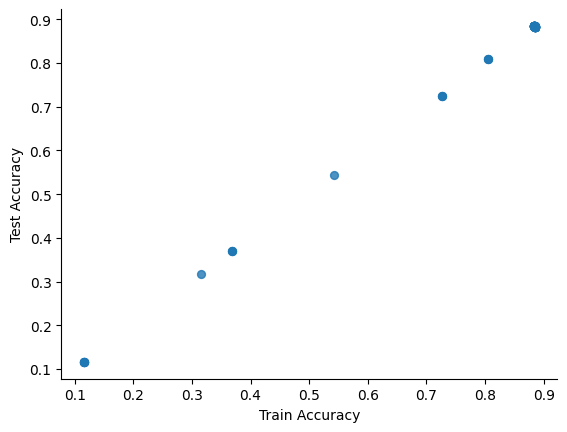

In [49]:
# @title Train Accuracy vs Test Accuracy

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Train Accuracy', y='Test Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

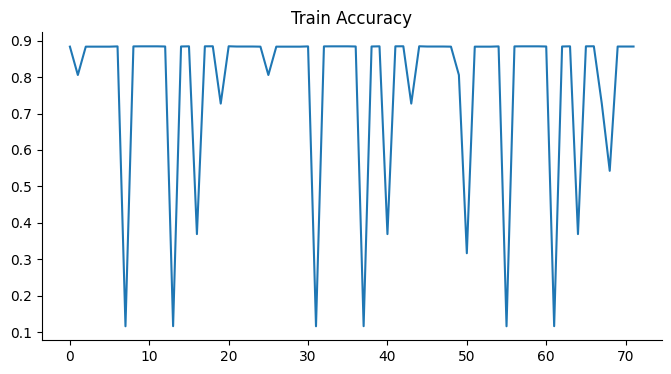

In [46]:
# @title Train Accuracy

from matplotlib import pyplot as plt
df_results['Train Accuracy'].plot(kind='line', figsize=(8, 4), title='Train Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

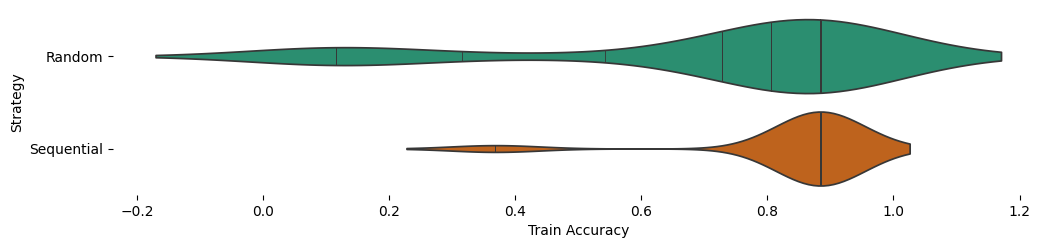

In [44]:
# @title Strategy vs Train Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Train Accuracy', y='Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

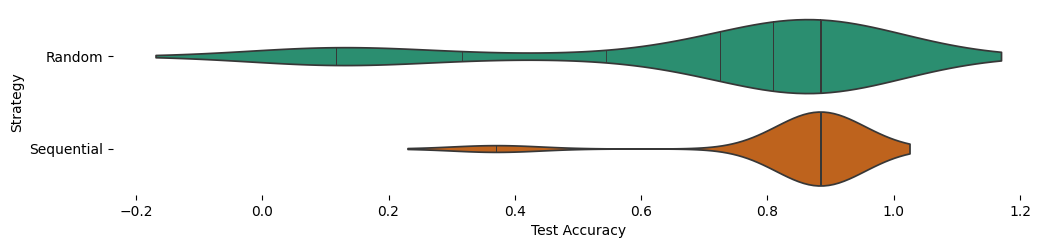

In [48]:
# @title Strategy vs Train Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Test Accuracy', y='Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

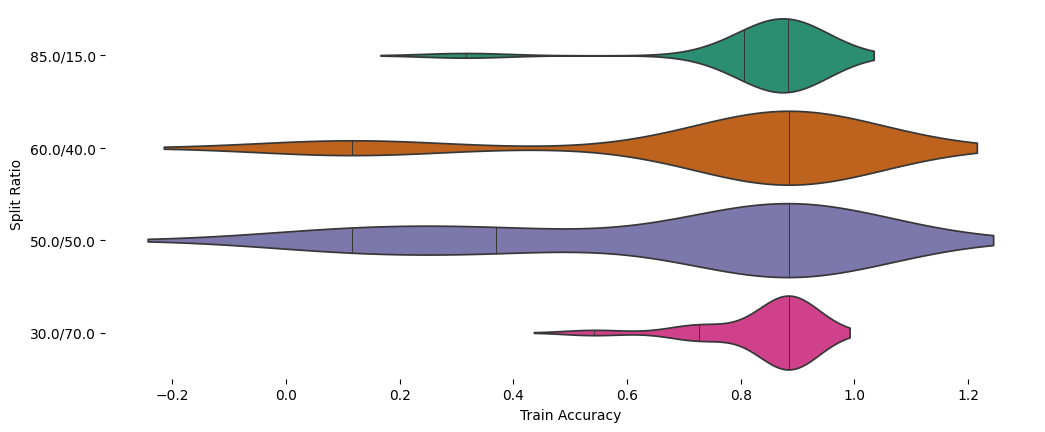

In [45]:
# @title Split Ratio vs Train Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Split Ratio'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Train Accuracy', y='Split Ratio', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

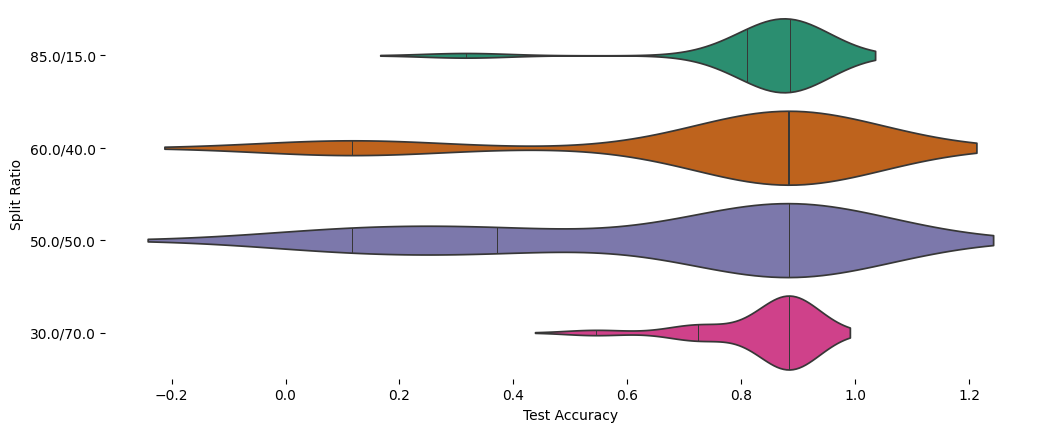

In [47]:
# @title Split Ratio vs Train Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Split Ratio'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Test Accuracy', y='Split Ratio', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_results)

https://docs.google.com/spreadsheets/d/1o6ARduwAFQGJuLCOpT42fspeQX9Zeh0I3lQ7U3K0Zos#gid=0


48


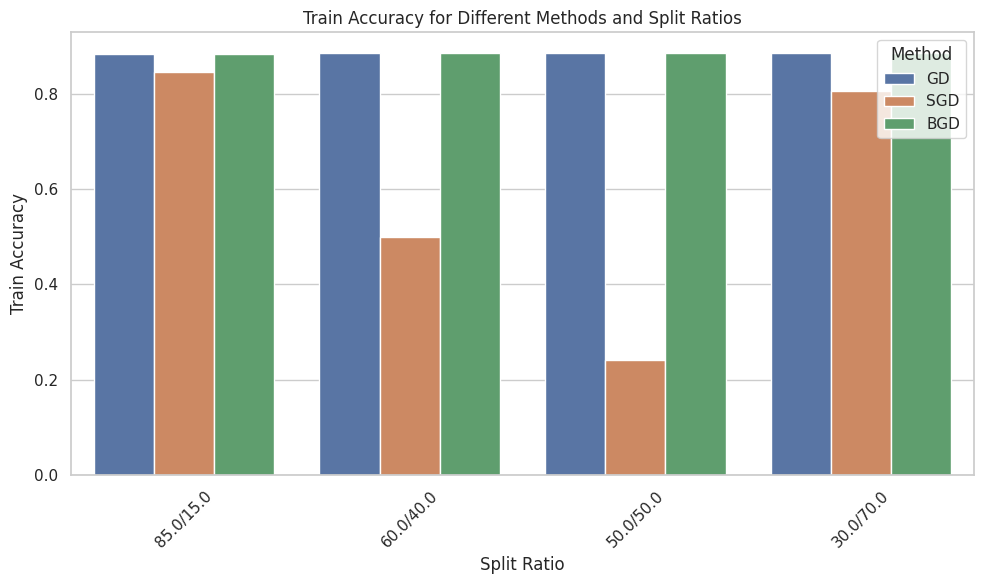

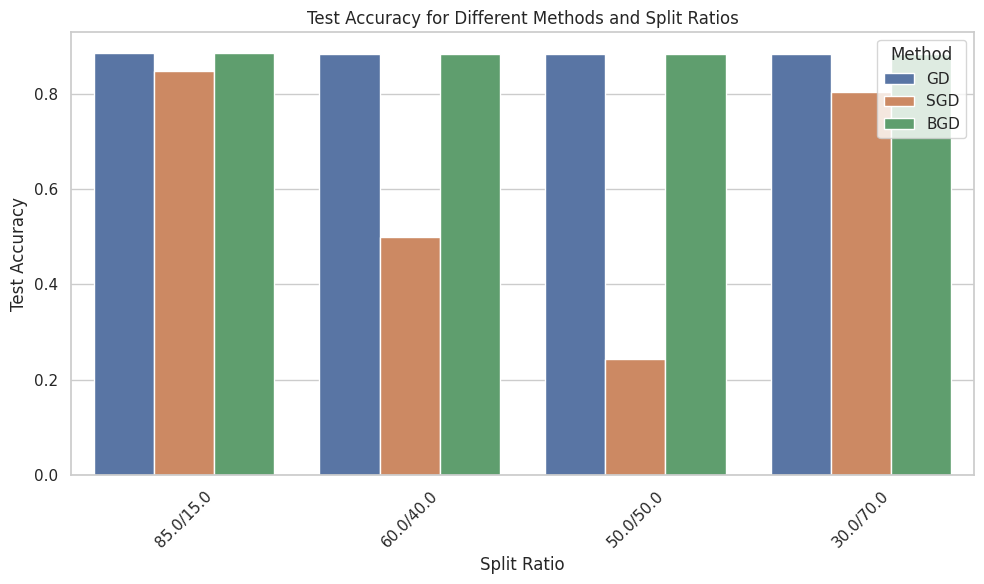

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data in a structured format
data = {
    "Method": ["GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD",

               "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD",

               "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD",
               "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD", "GD", "SGD", "BGD"],
    "Split Ratio": ["85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0",
                    "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0",
                    "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0",
                    "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0",
                    "85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0", "85.0/15.0",
                    "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0", "60.0/40.0",
                    "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0", "50.0/50.0",
                    "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0", "30.0/70.0"],
    "Strategy": ["Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential",
                 "Random", "Random", "Random", "Sequential", "Sequential", "Sequential"],
    "Train Accuracy": [0.8837, 0.8059, 0.8837, 0.8837, 0.8837, 0.8837, 0.8844, 0.1156, 0.8844, 0.8846, 0.8846, 0.8846,
                       0.8842, 0.1158, 0.8842, 0.8846, 0.3688, 0.8846, 0.8848, 0.7274, 0.8848, 0.8841, 0.8841, 0.8841,
                       0.8837, 0.8059, 0.8837, 0.8837, 0.8837, 0.8837, 0.8844, 0.1156, 0.8844, 0.8846, 0.8846, 0.8846,
                       0.8842, 0.1158, 0.8842, 0.8846, 0.3688, 0.8846, 0.8848, 0.7274, 0.8848, 0.8841, 0.8841, 0.8841],
    "Test Accuracy": [0.8846, 0.8091, 0.8846, 0.8846, 0.8846, 0.8846, 0.8830, 0.1170, 0.8830, 0.8828, 0.8828, 0.8828,
                      0.8836, 0.1164, 0.8836, 0.8831, 0.3705, 0.8831, 0.8835, 0.7247, 0.8835, 0.8838, 0.8838, 0.8838,
                      0.8846, 0.8091, 0.8846, 0.8846, 0.8846, 0.8846, 0.8830, 0.1170, 0.8830, 0.8828, 0.8828, 0.8828,
                      0.8836, 0.1164, 0.8836, 0.8831, 0.3705, 0.8831, 0.8835, 0.7247, 0.8835, 0.8838, 0.8838, 0.8838]
}
print(len(data["Train Accuracy"]))
# Creating a dataframe
df = pd.DataFrame(data)

# Plot
sns.set(style="whitegrid")

# Train Accuracy plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Split Ratio", y="Train Accuracy", hue="Method", ci=None)
plt.title("Train Accuracy for Different Methods and Split Ratios")
plt.xticks(rotation=45)
plt.tight_layout()

# Test Accuracy plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Split Ratio", y="Test Accuracy", hue="Method", ci=None)
plt.title("Test Accuracy for Different Methods and Split Ratios")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


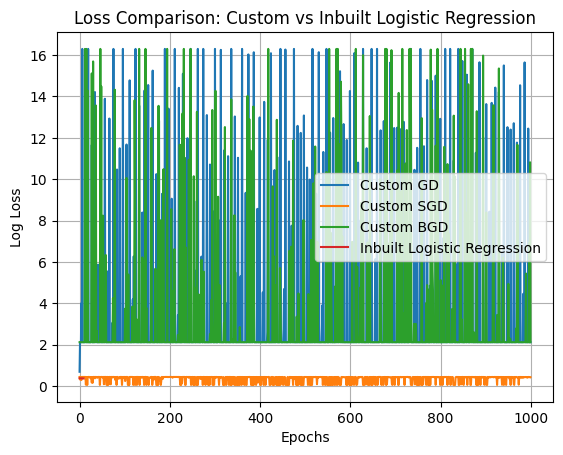

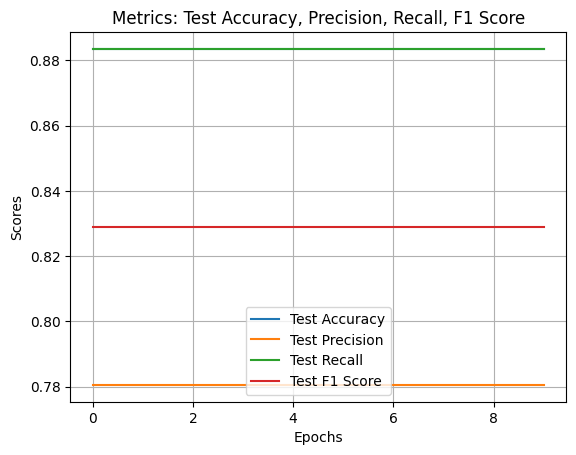

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def evaluate_inbuilt_logistic_regression(X_train, y_train, X_test, y_test, epochs=20):
    model = LogisticRegression(max_iter=1, warm_start=True, solver='saga')
    loss_history_train = []
    loss_history_test = []
    accuracy_train_history = []
    accuracy_test_history = []
    precision_train_history = []
    precision_test_history = []
    recall_train_history = []
    recall_test_history = []
    f1_train_history = []
    f1_test_history = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)
        y_prob_train = model.predict_proba(X_train)
        y_prob_test = model.predict_proba(X_test)

        # Log loss
        train_loss = log_loss(y_train, y_prob_train)
        test_loss = log_loss(y_test, y_prob_test)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train_history.append(accuracy_train)
        accuracy_test_history.append(accuracy_test)

        # Precision
        precision_train = precision_score(y_train, y_pred_train, average='weighted')  # Adjust average as needed
        precision_test = precision_score(y_test, y_pred_test, average='weighted')
        precision_train_history.append(precision_train)
        precision_test_history.append(precision_test)

        # Recall
        recall_train = recall_score(y_train, y_pred_train, average='weighted')  # Adjust average as needed
        recall_test = recall_score(y_test, y_pred_test, average='weighted')
        recall_train_history.append(recall_train)
        recall_test_history.append(recall_test)

        # F1 Score
        f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Adjust average as needed
        f1_test = f1_score(y_test, y_pred_test, average='weighted')
        f1_train_history.append(f1_train)
        f1_test_history.append(f1_test)

    return model, loss_history_train, loss_history_test, accuracy_train_history, accuracy_test_history, precision_train_history, precision_test_history, recall_train_history, recall_test_history, f1_train_history, f1_test_history

# Example of how to use the updated function
model_inbuilt, loss_history_train_inbuilt, loss_history_test_inbuilt, accuracy_train_history, accuracy_test_history, precision_train_history, precision_test_history, recall_train_history, recall_test_history, f1_train_history, f1_test_history = evaluate_inbuilt_logistic_regression(X_train, y_train, X_test, y_test, epochs=10)

# Plotting the results (Loss)
plt.plot(range(len(loss_history_gd)), loss_history_gd, label="Custom GD")
plt.plot(range(len(loss_history_sgd)), loss_history_sgd, label="Custom SGD")
plt.plot(range(len(loss_history_bgd)), loss_history_bgd, label="Custom BGD")
plt.plot(range(len(loss_history_test_inbuilt)), loss_history_test_inbuilt, label="Inbuilt Logistic Regression")

plt.title("Loss Comparison: Custom vs Inbuilt Logistic Regression")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy, precision, recall, and F1-score (you can create similar plots for each)
plt.plot(range(len(accuracy_test_history)), accuracy_test_history, label="Test Accuracy")
plt.plot(range(len(precision_test_history)), precision_test_history, label="Test Precision")
plt.plot(range(len(recall_test_history)), recall_test_history, label="Test Recall")
plt.plot(range(len(f1_test_history)), f1_test_history, label="Test F1 Score")

plt.title("Metrics: Test Accuracy, Precision, Recall, F1 Score")
plt.xlabel("Epochs")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

split_ratios = [(0.85, 0.15), (0.60, 0.40), (0.50, 0.50), (0.30, 0.70)]
strategies = ['random', 'sequential']
# X_train, X_test, y_train, y_test = train_test_split(
#         data_encoded.drop('Default', axis=1),
#         data_encoded['Default'],
#         test_size=test_size, random_state=42
#     )
# Dictionary to store results
results = []

# Function to split data based on strategy
def split_data(X, y, train_size, test_size, strategy):
    if strategy == 'random':
        return train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True)
    elif strategy == 'sequential':
        split_index = int(len(X) * train_size)
        return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Evaluate Logistic Regression on all split ratios and strategies
for train_size, test_size in split_ratios:
    for strategy in strategies:
        X_train, X_test, y_train, y_test = split_data(data_encoded.drop('Default', axis=1), data_encoded['Default'], train_size, test_size, strategy)

        # Logistic Regression Model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

        # Store results
        results.append({
            'Split Ratio': f"{train_size*100:.1f}/{test_size*100:.1f}",
            'Strategy': strategy.capitalize(),
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

# Convert results to a DataFrame for tabulation
df_results = pd.DataFrame(results)
df_results


,Split Ratio,Strategy,Train Accuracy,Test Accuracy
0,85.0/15.0,Random,0.884775,0.885022
1,85.0/15.0,Sequential,0.884908,0.885361
2,60.0/40.0,Random,0.885248,0.884080
3,60.0/40.0,Sequential,0.885626,0.883639
4,50.0/50.0,Random,0.884995,0.884605
5,50.0/50.0,Sequential,0.885606,0.884150
6,30.0/70.0,Random,0.885646,0.884600
7,30.0/70.0,Sequential,0.885163,0.884762


# **Final Report**
Prepare a LaTeX report comparing the performance of your custom Logistic Regression model with the inbuilt Logistic Regression function.

Include:
1.   Methodology description
2.   Performance metrics
1.   Visualizations
2.   Analysis of results
1.   Conclusions and insights gained




# **Submission Guidelines**
# Use LaTeX for the final report

*   Include all code implementations, visualizations, and result tables
*   Provide a thorough analysis of the performance differences between custom and inbuilt implementations
*   Create a report comparing the performance of a user-defined Logistic Regression model with the inbuilt Logistic Regression function
